## GSoC 2020 Student Application Test
#### CERN Project: Quantum Machine Learning for High Energy Physic


You will explore how best to apply machine learning algorithms, for example, Neural Network, Boosted Decision Tree (BDT), Support Vector Machine(SVM) to solve a High Energy Data analysis issue, more specifically,  separating the signal events from the background events.

A set of input samples (simulated with Delphes) is provided in NumPy NPZ format. In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this task. The signal events are labeled with 1 while the background sample are labeled with 0.

You can apply one machine learning algorithm to this input but be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC).

#### Loading data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = np.load('QIS_EXAM_200Events.npz', allow_pickle=True)

train_dataset = file['training_input'].item()
test_dataset = file['test_input'].item()

#### Data investigation

In [2]:
df_train_0 = pd.DataFrame(train_dataset['0'])
df_test_0  = pd.DataFrame(test_dataset['0'])

df_train_0.describe()

,0,1,2,3,4
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.454617,-0.103901,-0.224488,-0.796956,-0.576463
std,0.605700,0.902026,0.652320,0.122736,0.054428
min,-0.999915,-0.999931,-0.933175,-0.929184,-0.730352
25%,-0.998979,-0.999337,-0.924206,-0.865289,-0.597834
50%,-0.431735,-0.193156,0.076867,-0.826015,-0.582649
75%,-0.426285,0.864718,0.077533,-0.775574,-0.541973
max,0.919312,0.880835,0.934484,-0.246957,-0.401706


In [3]:
df_train_1 = pd.DataFrame(train_dataset['1'])
df_test_1  = pd.DataFrame(test_dataset['1'])

df_train_1.describe()

,0,1,2,3,4
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.330350,-0.201806,-0.156798,-0.675110,-0.540111
std,0.646656,0.825911,0.760558,0.227266,0.123972
min,-0.999097,-0.999338,-0.936612,-0.912692,-0.844211
25%,-0.232165,-0.950013,-0.673098,-0.808118,-0.608291
50%,0.351122,-0.911842,-0.661179,-0.723618,-0.550558
75%,0.889373,0.579163,0.918008,-0.617599,-0.507115
max,0.933783,0.886309,0.932132,0.155652,-0.169384


In [0]:
df_train = df_train_0.append(df_train_1)
df_test  = df_test_0.append(df_test_1)

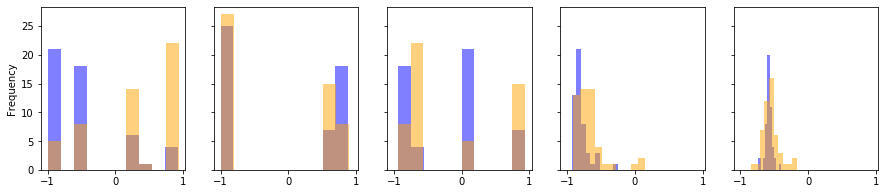

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharex=True, sharey=True)
for i in np.arange(0, 5):
    df_train_0[i].plot.hist(alpha=0.5, ax=axes[i], color='blue')
    df_train_1[i].plot.hist(alpha=0.5, ax=axes[i], color='orange')

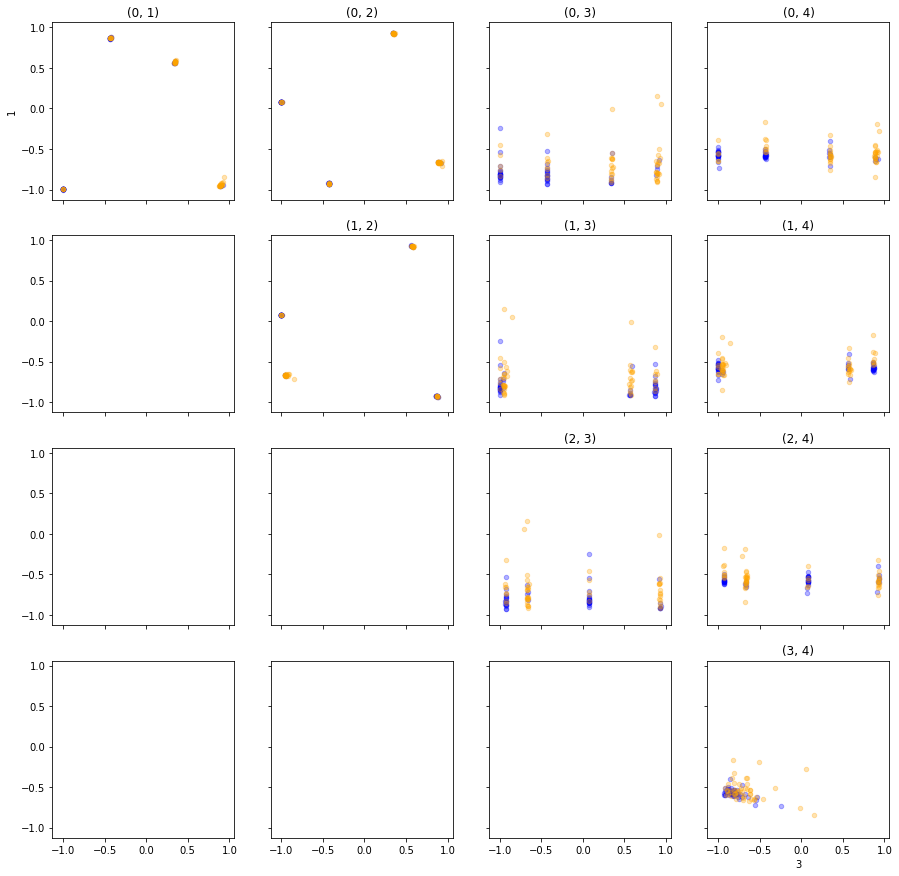

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=True, sharey=True)
all_unique_tupes = [(i, j) for i in range(0, 5) for j in range(i+1, 5)]
for i, j in all_unique_tupes:
        df_train_0.plot.scatter(x=i, y=j, alpha=0.3, ax=axes[i, j-1], c='blue') 
        df_train_1.plot.scatter(x=i, y=j, alpha=0.3, ax=axes[i, j-1], c='orange')
        axes[i, j-1].set_title((i, j))

#### Data preprocessing 

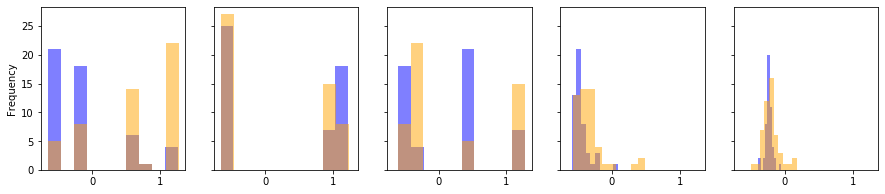

In [7]:
# Zero meaning the data
df_train_0 -= df_train.mean().mean()
df_train_1 -= df_train.mean().mean()

df_test_0 -= df_test.mean().mean()
df_test_1 -= df_test.mean().mean()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharex=True, sharey=True)
for i in np.arange(0, 5):
    df_train_0[i].plot.hist(alpha=0.5, ax=axes[i], color='blue')
    df_train_1[i].plot.hist(alpha=0.5, ax=axes[i], color='orange')

In [0]:
from sklearn.utils import shuffle

X_train = np.append(df_train_0.values, df_train_1.values, axis=0)
y_train = np.array([[0] * len(df_train_0), [1] * len(df_train_1)]).reshape(1,-1)[0]

X_test = np.append(df_test_0.values, df_test_1.values, axis=0)
y_test = np.array([[0] * len(df_test_0), [1] * len(df_train_1)]).reshape(1,-1)[0]

X_train, y_train = shuffle(X_train, y_train)
X_test,  y_test  = shuffle(X_test,  y_test)

X_train = np.append(X_train, X_test[50:], axis=0)
y_train = np.append(y_train, y_test[50:], axis=0)
X_test = X_test[:50]
y_test = y_test[:50]

#### SVMs

In [9]:
from sklearn import svm
from sklearn.metrics import classification_report

clf_svm = svm.SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

print("SVM accuracy on the test data: {}".format(clf_svm.score(X_test, y_test)))
print("SVM support vector amount: {}".format(clf_svm.n_support_))

y_pred = clf_svm.predict(X_test)
print("SVM report: \n {}".format(classification_report(y_test, y_pred)))

SVM accuracy on the test data: 0.76
SVM support vector amount: [46 47]
SVM report: 
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        26
           1       0.88      0.58      0.70        24

    accuracy                           0.76        50
   macro avg       0.79      0.75      0.75        50
weighted avg       0.79      0.76      0.75        50



Softening the margin with lower C as we have a lot of overlapping data

In [19]:
clf_svm = svm.SVC(C = 1e-5, gamma='auto')
clf_svm.fit(X_train, y_train)

print("SVM accuracy on the test data: {}".format(clf_svm.score(X_test, y_test)))
print("SVM support vector amount: {}".format(clf_svm.n_support_))

SVM accuracy on the test data: 0.48
SVM support vector amount: [74 74]


The data seems to form 3-4 clusters (see plot above), so we can perform classification on them seperately.

In [11]:
from sklearn.cluster import KMeans

cluster_amount = 3

kmeans = KMeans(n_clusters = cluster_amount)
clusters_train = kmeans.fit_predict(X_train)
clusters_test = kmeans.predict(X_test)

score_all = 0
for i in range(0, cluster_amount):
    clf_svm = svm.SVC(gamma='auto')
    clf_svm.fit(X_train[clusters_train == i], y_train[clusters_train == i])
    score = clf_svm.score(X_test[clusters_test == i], y_test[clusters_test == i])
    print("SVM accuracy for class {}: {}".format(i, score))
    
    score_all += score
print("--------------------------")
print("Overall average classification accuracy: {}".format(score_all / cluster_amount))

SVM accuracy for class 0: 0.7777777777777778
SVM accuracy for class 1: 0.7307692307692307
SVM accuracy for class 2: 0.8
--------------------------
Overall average classification accuracy: 0.7695156695156694


#### Random forests

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 50, 
                                max_depth = None, 
                                min_samples_split = 3)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print("Cross validation mean accuracy: {}".format(scores.mean()))

clf_rf.fit(X_train, y_train)
score = clf_rf.score(X_test, y_test)
print("Random Forest accuracy on the test data: {}".format(score))

Cross validation mean accuracy: 0.6933333333333332
Random Forest accuracy on the test data: 0.76


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(clf_rf)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Cross validation mean accuracy: {}".format(scores.mean()))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Boosted Random Forest Accuracy on the test data: {}".format(score))

Cross validation mean accuracy: 0.6799999999999999
Boosted Random Forest Accuracy on the test data: 0.8


#### Artificial Neural Networks

In [20]:
import tensorflow as tf
import keras

layer_common_params = {
    'activation' : 'relu', 
    'kernel_regularizer' : keras.regularizers.l2(0.01), 
    'kernel_initializer' : 'random_uniform'
    }

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_dim = 5, **layer_common_params),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(512, **layer_common_params),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, **layer_common_params),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.1)
model.evaluate(X_test, y_test)

Train on 135 samples, validate on 15 samples
Epoch 1/20
135/135 [==============================] - 0s 2ms/sample - loss: 1.0041 - acc: 0.6889 - val_loss: 0.9695 - val_acc: 0.6000
Epoch 2/20
135/135 [==============================] - 0s 362us/sample - loss: 0.8508 - acc: 0.7333 - val_loss: 0.8906 - val_acc: 0.6667
Epoch 3/20
135/135 [==============================] - 0s 322us/sample - loss: 0.7577 - acc: 0.7407 - val_loss: 0.8420 - val_acc: 0.6667
Epoch 4/20
135/135 [==============================] - 0s 292us/sample - loss: 0.7186 - acc: 0.7481 - val_loss: 0.8101 - val_acc: 0.6667
Epoch 5/20
135/135 [==============================] - 0s 309us/sample - loss: 0.7109 - acc: 0.7407 - val_loss: 0.7860 - val_acc: 0.6667
Epoch 6/20
135/135 [==============================] - 0s 282us/sample - loss: 0.6615 - acc: 0.7333 - val_loss: 0.7705 - val_acc: 0.6667
Epoch 7/20
135/135 [==============================] - 0s 316us/sample - loss: 0.6583 - acc: 0.7333 - val_loss: 0.7576 - val_acc: 0.6667
Epoch

[0.6238063526153564, 0.78]